In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

### Clean dataset

In [2]:
# set image and ground truth folders
image_folder = "../datasets/kaggle/images"
gt_folder = "../datasets/kaggle/groundtruth"

In [3]:
# get paths to images and gt
image_files = sorted(
    [os.path.join(image_folder, file) for file in os.listdir(image_folder)]
)
gt_files = sorted([os.path.join(gt_folder, file) for file in os.listdir(gt_folder)])

In [4]:
print("Number of images:", len(image_files))
print("Number of groundtruths:", len(gt_files))

Number of images: 18297
Number of groundtruths: 18298


#### Find mismatch

In [5]:
# function to remove file extension
def remove_extension(filename):
    return os.path.splitext(filename)[0]


# eExtract and normalize filenames from the paths
image_filenames = [remove_extension(os.path.basename(path)) for path in image_files]
gt_filenames = [remove_extension(os.path.basename(path)) for path in gt_files]

# convert to sets for comparison
set_image_filenames = set(image_filenames)
set_gt_filenames = set(gt_filenames)

# find mismatch
mismatch_in_images = list(set_image_filenames - set_gt_filenames)
mismatch_in_gt = list(set_gt_filenames - set_image_filenames)

print("Mismatch in image files:", mismatch_in_images)
print("Mismatch in groundtruth files:", mismatch_in_gt)

Mismatch in image files: []
Mismatch in groundtruth files: ['boston_2363']


In [6]:
# remove file 'boston_2363' from groundtruth
os.remove(os.path.join(gt_folder, "boston_2363.png"))

In [7]:
# get paths to images and gt
image_files = sorted(
    [os.path.join(image_folder, file) for file in os.listdir(image_folder)]
)
gt_files = sorted([os.path.join(gt_folder, file) for file in os.listdir(gt_folder)])
print("Number of images:", len(image_files))
print("Number of groundtruths:", len(gt_files))

Number of images: 18297
Number of groundtruths: 18297


#### Delete images from boston, since they are not similar to our train

In [10]:
# delete all images from boston_ in image and gt folders
for file in image_files:
    if "boston_" in file:
        os.remove(file)
for file in gt_files:
    if "boston_" in file:
        os.remove(file)

#### Delete if gt has <10% roads

In [17]:
# delete images if the groundtruth has less than % of white pixels
threshold = 0.1

for i in range(len(image_files)):
    # load image and groundtruth
    image = Image.open(image_files[i])
    gt = Image.open(gt_files[i])

    # convert to numpy arrays
    image = np.array(image)
    gt = np.array(gt)

    # count white pixels
    white_pixels = np.sum(gt == 255)

    # delete image and groundtruth if the groundtruth has less than % of white pixels
    if white_pixels < threshold * gt.shape[0] * gt.shape[1]:
        os.remove(image_files[i])
        os.remove(gt_files[i])
        print("Deleted image:", image_files[i])
        print("Deleted groundtruth:", gt_files[i])

Deleted image: ../datasets/kaggle/images/losangeles_1004.jpg
Deleted groundtruth: ../datasets/kaggle/groundtruth/losangeles_1004.png
Deleted image: ../datasets/kaggle/images/losangeles_1006.jpg
Deleted groundtruth: ../datasets/kaggle/groundtruth/losangeles_1006.png
Deleted image: ../datasets/kaggle/images/losangeles_1010.jpg
Deleted groundtruth: ../datasets/kaggle/groundtruth/losangeles_1010.png
Deleted image: ../datasets/kaggle/images/losangeles_1019.jpg
Deleted groundtruth: ../datasets/kaggle/groundtruth/losangeles_1019.png
Deleted image: ../datasets/kaggle/images/losangeles_1020.jpg
Deleted groundtruth: ../datasets/kaggle/groundtruth/losangeles_1020.png
Deleted image: ../datasets/kaggle/images/losangeles_1033.jpg
Deleted groundtruth: ../datasets/kaggle/groundtruth/losangeles_1033.png
Deleted image: ../datasets/kaggle/images/losangeles_1045.jpg
Deleted groundtruth: ../datasets/kaggle/groundtruth/losangeles_1045.png
Deleted image: ../datasets/kaggle/images/losangeles_1059.jpg
Deleted 

In [18]:
# get paths to images and gt
image_files = sorted(
    [os.path.join(image_folder, file) for file in os.listdir(image_folder)]
)
gt_files = sorted([os.path.join(gt_folder, file) for file in os.listdir(gt_folder)])
print("Number of images:", len(image_files))
print("Number of groundtruths:", len(gt_files))

Number of images: 7470
Number of groundtruths: 7470


### Visual check

losangeles_0.jpg


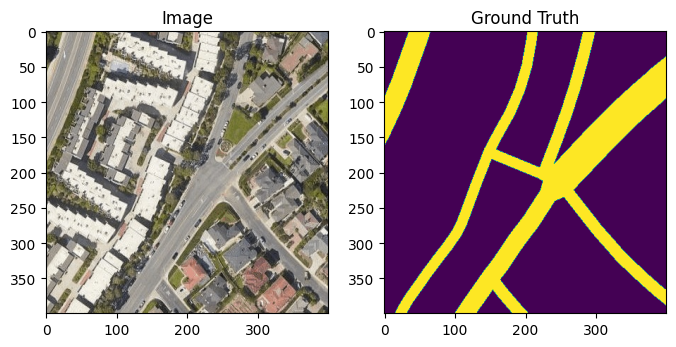

In [20]:
for image_path, gt_path in zip(image_files, gt_files):
    image_name = image_path.split("/")[-1]
    print(image_name)
    image = Image.open(image_path)
    gt = Image.open(gt_path)
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].imshow(image)
    ax[0].set_title("Image")
    ax[1].imshow(gt)
    ax[1].set_title("Ground Truth")
    plt.show()
    break